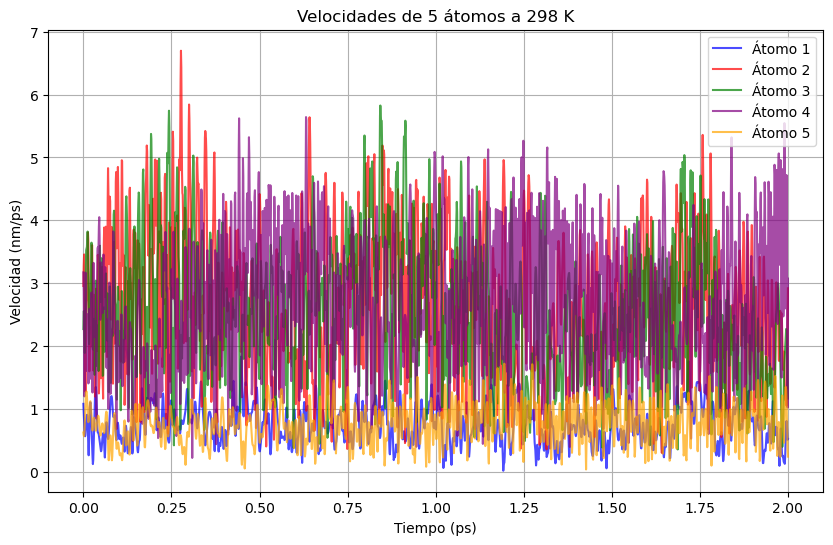

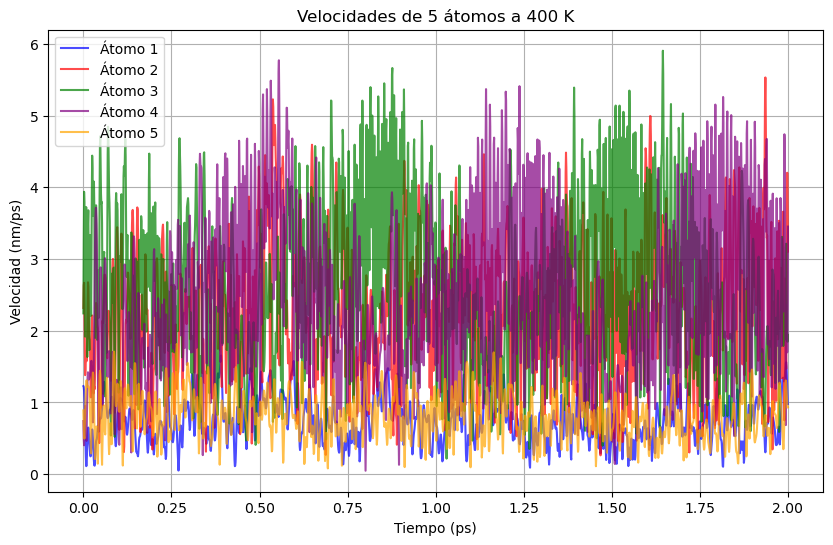

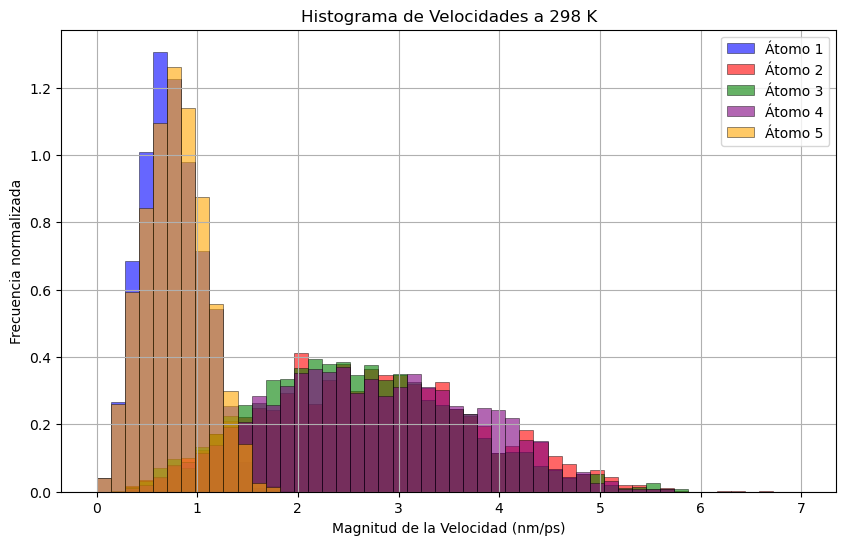

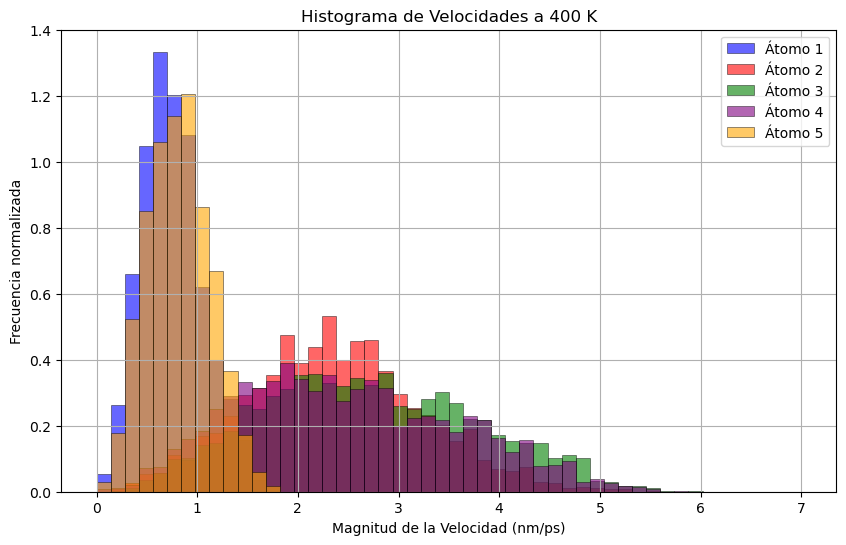

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_xvg(filename):
    """Carga los datos desde un archivo .xvg, ignorando comentarios."""
    if not os.path.exists(filename):
        print(f"Error: El archivo {filename} no existe.")
        return None
    
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip() and not line.startswith(('@', '#')):
                data.append([float(x) for x in line.split()])
    return np.array(data)

def plot_velocity(file, temp, output_file, colors, num_atoms=5):
    """Carga y grafica velocidades de varios átomos desde un archivo .xvg y guarda la imagen."""
    data = load_xvg(file)
    
    if data is None:
        print(f"Error al cargar el archivo {file}. Verifica que exista y tenga datos válidos.")
        return
    
    time = data[:, 0]  # Primera columna es el tiempo
    num_columns_per_atom = 4  # 3 para velocidad, 1 para vmag
    
    plt.figure(figsize=(10, 6))
    
    for i in range(num_atoms):
        vmag_idx = 4 + i * num_columns_per_atom  # Índice de la magnitud de velocidad
        vmag = data[:, vmag_idx]
        plt.plot(time, vmag, label=f'Átomo {i+1}', color=colors[i], alpha=0.7)
    
    plt.xlabel('Tiempo (ps)')
    plt.ylabel('Velocidad (nm/ps)')
    plt.legend()
    plt.title(f'Velocidades de {num_atoms} átomos a {temp} K')
    plt.grid()
    plt.savefig(output_file, dpi=300)
    plt.show()

def plot_histogram(file, temp, output_file, colors, num_atoms=5, n_bins=50):
    """Carga datos y genera histogramas de magnitud de velocidad para varios átomos con menos bins para mejor visualización."""
    data = load_xvg(file)
    
    if data is None:
        print(f"Error al cargar el archivo {file}. Verifica que exista y tenga datos válidos.")
        return
    
    num_columns_per_atom = 4  # 3 para velocidad, 1 para vmag
    v_min, v_max = 0, 7  # La velocidad no puede ser negativa
    
    plt.figure(figsize=(10, 6))
    
    for i in range(num_atoms):
        vmag_idx = 4 + i * num_columns_per_atom  # Índice de la magnitud de velocidad
        vmag = data[:, vmag_idx]
        plt.hist(vmag, bins=n_bins, range=(v_min, v_max), color=colors[i], alpha=0.6, density=True, label=f'Átomo {i+1}', edgecolor='black', linewidth=0.5)
    
    plt.xlabel("Magnitud de la Velocidad (nm/ps)")
    plt.ylabel("Frecuencia normalizada")
    plt.title(f'Histograma de Velocidades a {temp} K')
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file, dpi=300)
    plt.show()

# Uso del script con 5 átomos
colors = ["blue", "red", "green", "purple", "orange"]
plot_velocity('veloc298.xvg', 298, 'velocities_298K.png', colors)
plot_velocity('veloc400.xvg', 400, 'velocities_400K.png', colors)
plot_histogram('veloc298.xvg', 298, 'histograma_298K.png', colors)
plot_histogram('veloc400.xvg', 400, 'histograma_400K.png', colors)

